In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Análisis de la información

In [56]:
df_db = pd.read_csv('data.csv', delimiter=',', header='infer')
df_db.head(4)

,title,id_collection,name_collection,budget,genres,id,original_language,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,return,crew
0,Toy Story,10194.0,Toy Story Collection,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,7.7,5415.0,12.451801,['John Lasseter']
1,Jumanji,NaN,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,6.9,2413.0,4.043035,['Joe Johnston']
2,Grumpier Old Men,119050.0,Grumpy Old Men Collection,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,0.000000,['Howard Deutch']
3,Waiting to Exhale,NaN,NaN,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,6.1,34.0,5.090760,['Forest Whitaker']


In [22]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 45345 non-null  object 
 1   id_collection         4485 non-null   float64
 2   name_collection       4485 non-null   object 
 3   budget                45345 non-null  int64  
 4   genres                45345 non-null  object 
 5   id                    45345 non-null  int64  
 6   original_language     45334 non-null  object 
 7   overview              44399 non-null  object 
 8   popularity            45345 non-null  float64
 9   production_companies  45345 non-null  object 
 10  production_countries  45345 non-null  object 
 11  release_date          45345 non-null  object 
 12  revenue               45345 non-null  float64
 13  runtime               45099 non-null  float64
 14  spoken_languages      45345 non-null  object 
 15  status             

In [23]:
#Analisis de las variables numericas
df_db.describe(include='number').round(1)

,id_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,return
count,4485.0,45345.0,45345.0,45345.0,4.534500e+04,45099.0,45345.0,45345.0,45345.0
mean,184146.0,4232673.1,108035.7,2.9,1.123390e+07,94.2,5.6,110.1,660.5
std,141641.9,17443911.8,112180.1,6.0,6.441058e+07,38.3,1.9,491.9,74718.8
min,10.0,0.0,2.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
25%,86027.0,0.0,26390.0,0.4,0.000000e+00,85.0,5.0,3.0,0.0
50%,141615.0,0.0,59852.0,1.1,0.000000e+00,95.0,6.0,10.0,0.0
75%,294172.0,0.0,156597.0,3.7,0.000000e+00,107.0,6.8,34.0,0.0
max,480160.0,380000000.0,469172.0,547.5,2.787965e+09,1256.0,10.0,14075.0,12396383.0


In [24]:
#Analisis de las variables 
df_db.describe(include=object)

,title,name_collection,genres,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,crew
count,45345,4485,45345,45334,44399,45345,45345,45345,45345,45265,20386,45345
unique,42190,1695,4065,89,44230,22666,2389,17333,1931,6,20267,18829
top,Cinderella,The Bowery Boys,['Drama'],en,No overview found.,[],['United States of America'],2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,[]
freq,11,29,4994,32184,133,11788,17836,136,22366,44906,7,835


In [25]:
df_db['revenue'] = df_db['revenue'].apply(lambda x: "{:.1f}".format(x)).astype(float)

df_db.dropna(subset='revenue', how='any', inplace=True)
#df_db['revenue'].apply(lambda x: float(x))
df_db = df_db.drop(df_db[df_db['revenue'] == 0].index)
df_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7397 entries, 0 to 45302
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7397 non-null   object 
 1   id_collection         1481 non-null   float64
 2   name_collection       1481 non-null   object 
 3   budget                7397 non-null   int64  
 4   genres                7397 non-null   object 
 5   id                    7397 non-null   int64  
 6   original_language     7397 non-null   object 
 7   overview              7375 non-null   object 
 8   popularity            7397 non-null   float64
 9   production_companies  7397 non-null   object 
 10  production_countries  7397 non-null   object 
 11  release_date          7397 non-null   object 
 12  revenue               7397 non-null   float64
 13  runtime               7391 non-null   float64
 14  spoken_languages      7397 non-null   object 
 15  status              

# Análisis de relación entre variables

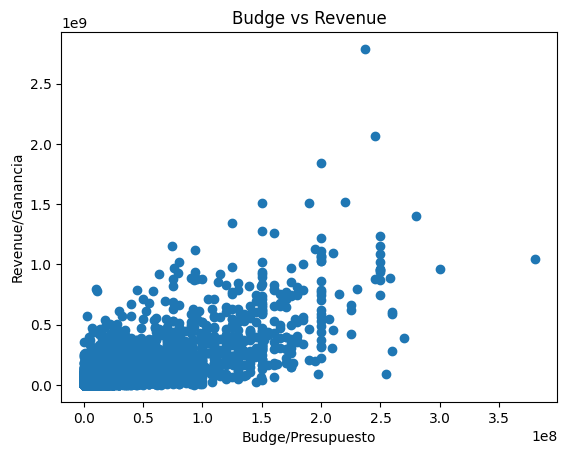

In [26]:
df_db['budget'] = df_db['budget'].apply(lambda x: "{:.1f}".format(x)).astype(float)
plt.scatter(df_db['budget'], df_db['revenue'])
plt.xlabel('Budge/Presupuesto')
plt.ylabel('Revenue/Ganancia')
plt.title('Budge vs Revenue')
plt.show()

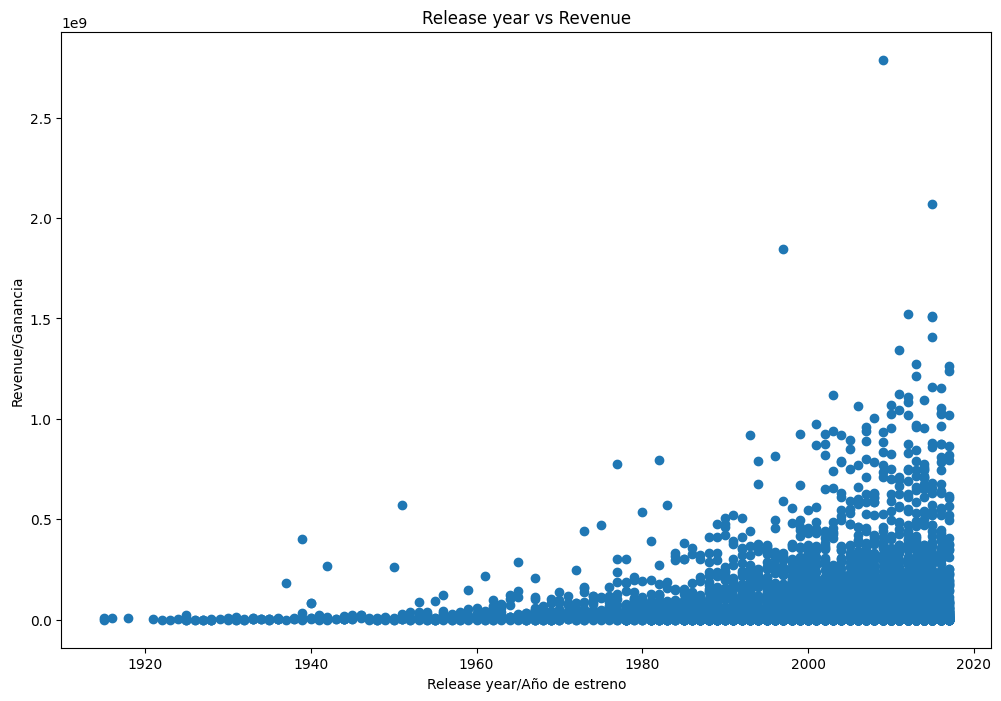

In [48]:
from datetime import datetime

df_db['release_year']=df_db['release_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
plt.figure(figsize=(12, 8))
plt.scatter(df_db['release_year'], df_db['revenue'])
plt.xlabel('Release year/Año de estreno')
plt.ylabel('Revenue/Ganancia')
plt.title('Release year vs Revenue')
plt.show()

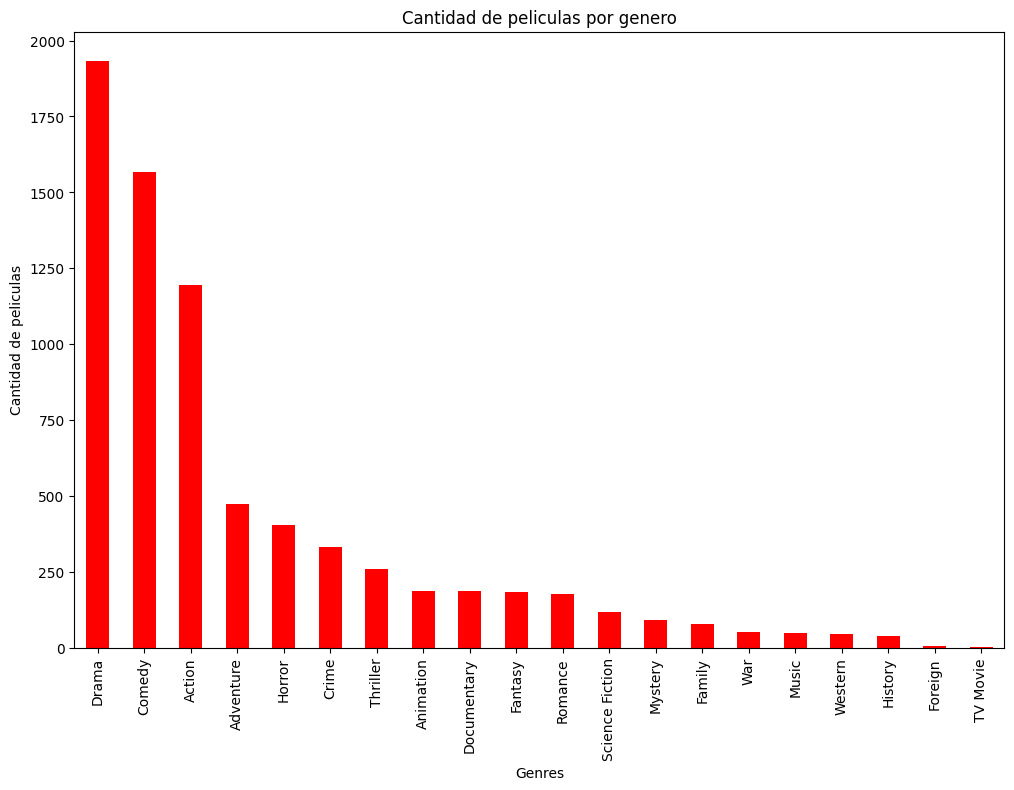

In [45]:
import ast

df_genere = df_db.dropna(subset=['genres'])
df_genere['genres'] = df_genere['genres'].apply(ast.literal_eval).str[0].str.strip()
movie_counts = df_genere['genres'].value_counts()

plt.figure(figsize=(12, 8))
movie_counts.plot(kind='bar',color='red')
plt.xlabel('Genres/Géneros')
plt.ylabel('Cantidad de peliculas')
plt.title('Cantidad de peliculas por genero')
plt.xticks(rotation=90)
plt.show()

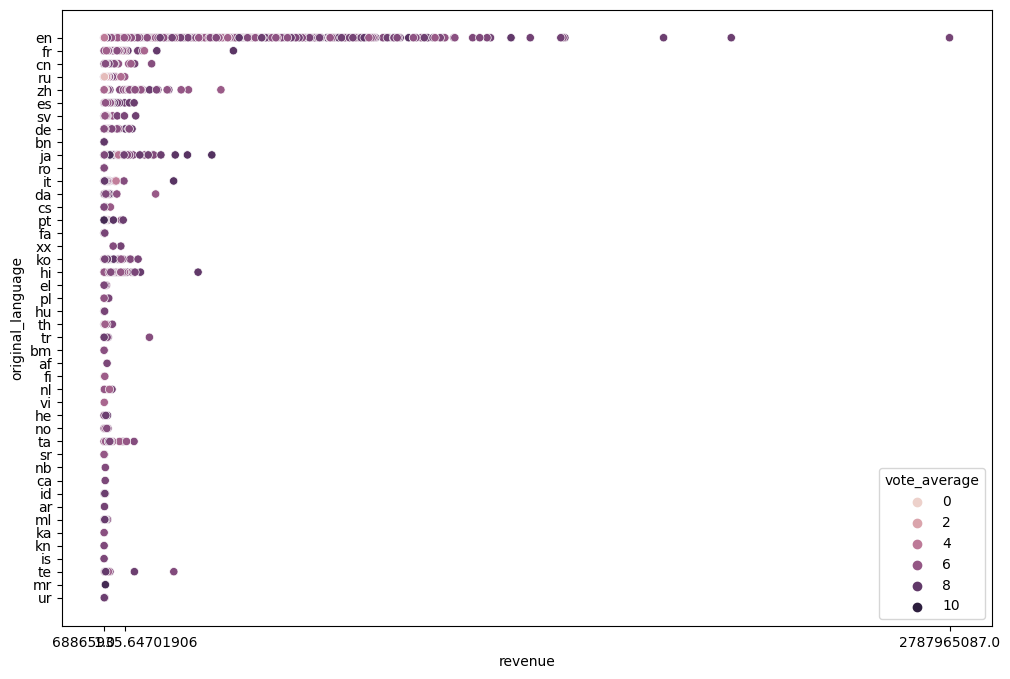

In [50]:
min_revenue = df_db['revenue'].min()
mean_revenue = df_db['revenue'].mean()
max_revenue = df_db['revenue'].max()

# Convertir los valores en una lista
x_ticks = [min_revenue, mean_revenue, max_revenue]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_db, x='revenue', y='original_language', hue='vote_average')
plt.xticks(x_ticks, ['Min', 'Mean', 'Max'])  # Establecer los valores específicos en el eje x
plt.title('Voto promedio segun idioma, considerando las ganancias')

plt.show()

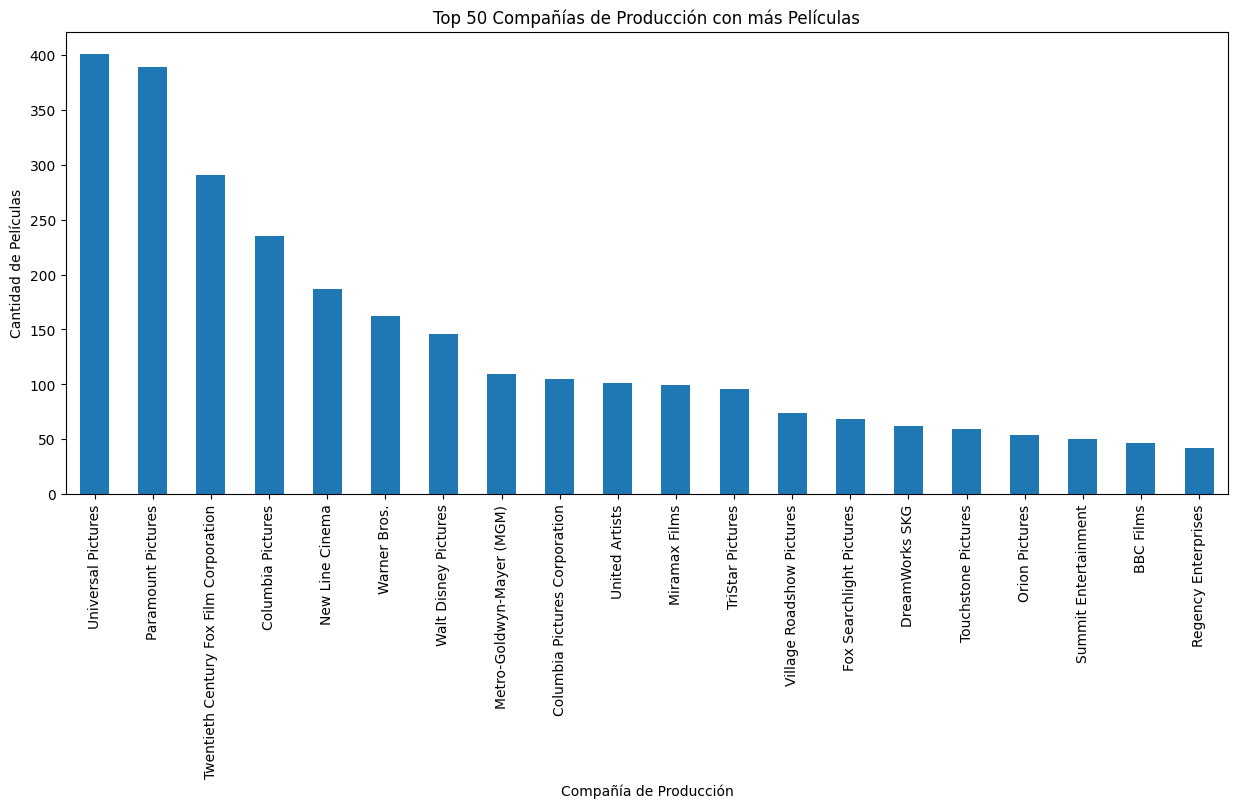

In [46]:
df_companies = df_db.dropna(subset=['production_companies'])
df_companies['production_companiess'] = df_companies['production_companies'].apply(ast.literal_eval).str[0].str.strip()
production_companies_counts = df_companies['production_companiess'].value_counts().head(20)
# Creacion del grafico
plt.figure(figsize=(15, 6))
production_companies_counts.plot(kind='bar')
plt.xlabel('Compañía de Producción')
plt.ylabel('Cantidad de Películas')
plt.title('Top 50 Compañías de Producción con más Películas')
plt.show()

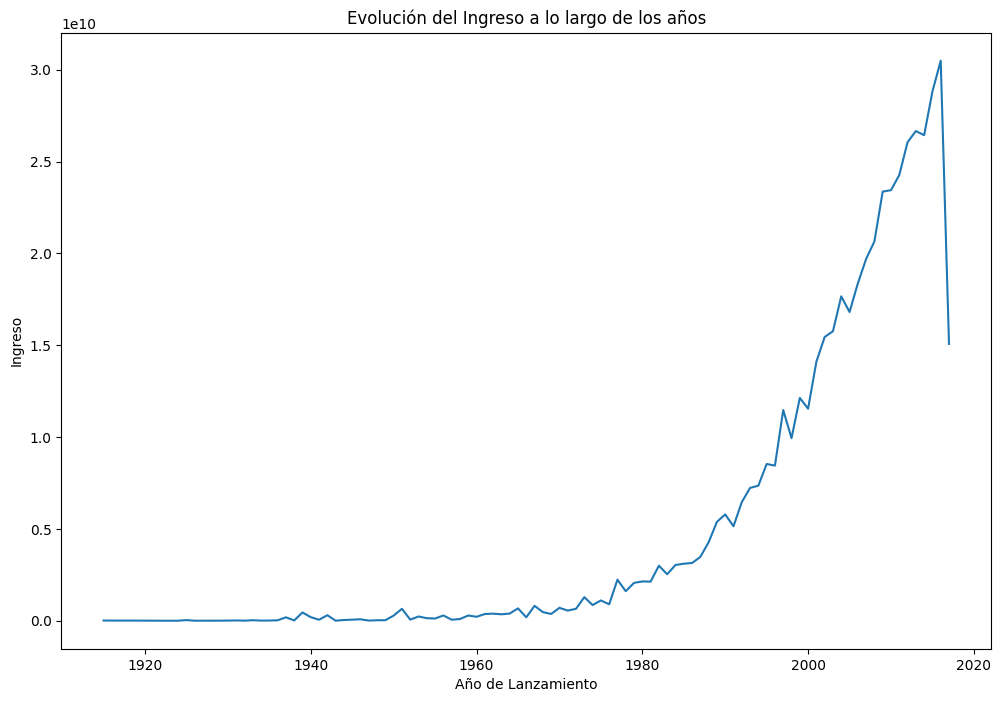

In [47]:
df_db['release_year']=df_db['release_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
plt.figure(figsize=(12, 8))
df_db.groupby('release_year')['revenue'].sum().plot.line()
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ingreso')
plt.title('Evolución del Ingreso a lo largo de los años')
plt.show()

## Nube de palabras

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtén los datos de tus títulos en una lista
titles = df_db['title'].astype(str).tolist()

# # Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(titles))

# # Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Overview')
plt.show()


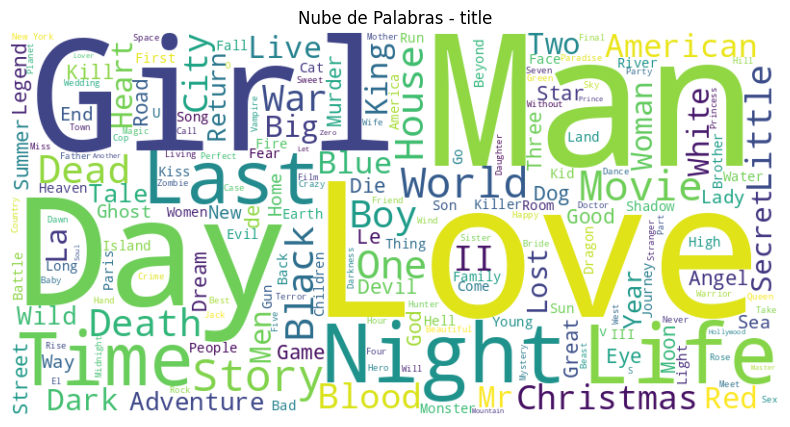